# CNN

In [ ]:
!pip install tensorflow

In [ ]:
# Load data
data = pd.read_csv('data.csv', index_col='prename')
pheno = pd.read_csv('pheno.csv', index_col='prename')


Classification for CIP:
6/6 [==============================] - 0s 4ms/step
CNN Accuracy: 0.9295426452410384

CNN Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       443
           1       0.92      0.93      0.92       366

    accuracy                           0.93       809
   macro avg       0.93      0.93      0.93       809
weighted avg       0.93      0.93      0.93       809



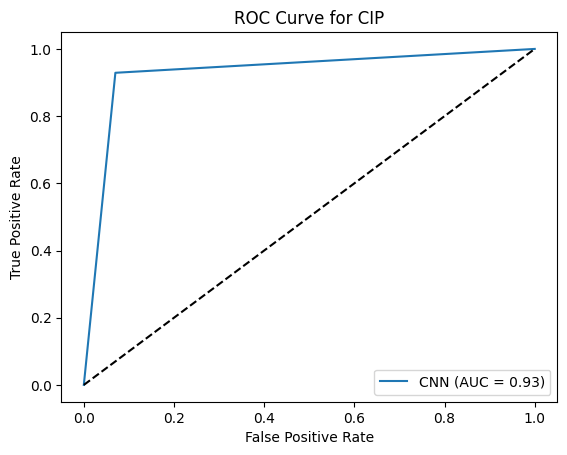


Classification for CTX:
6/6 [==============================] - 0s 3ms/step
CNN Accuracy: 0.7898640296662547

CNN Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       451
           1       0.74      0.80      0.77       358

    accuracy                           0.79       809
   macro avg       0.79      0.79      0.79       809
weighted avg       0.79      0.79      0.79       809



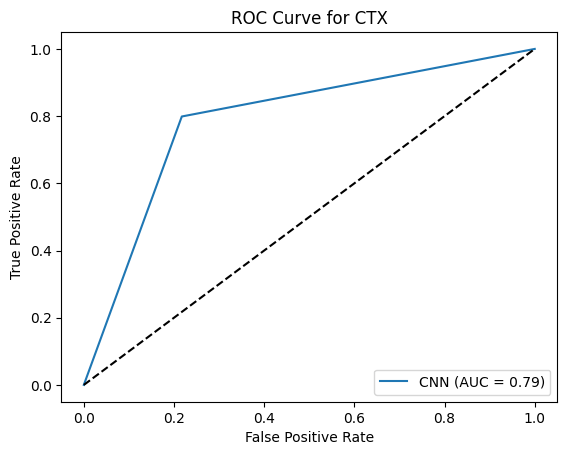


Classification for CTZ:
6/6 [==============================] - 0s 5ms/step
CNN Accuracy: 0.8677379480840544

CNN Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       533
           1       0.84      0.76      0.80       276

    accuracy                           0.87       809
   macro avg       0.86      0.84      0.85       809
weighted avg       0.87      0.87      0.87       809



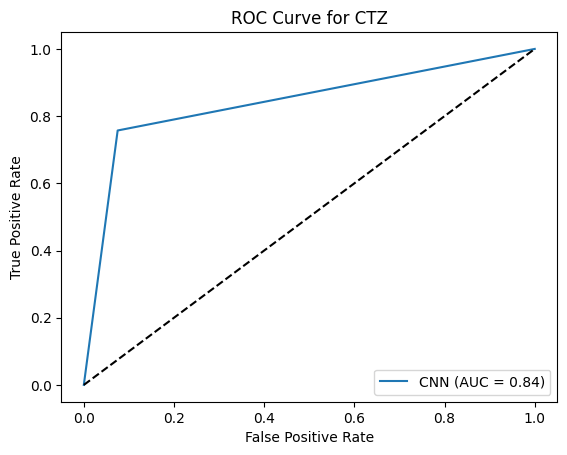


Classification for GEN:
6/6 [==============================] - 0s 6ms/step
CNN Accuracy: 0.8343634116192831

CNN Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       621
           1       0.66      0.59      0.62       188

    accuracy                           0.83       809
   macro avg       0.77      0.75      0.76       809
weighted avg       0.83      0.83      0.83       809



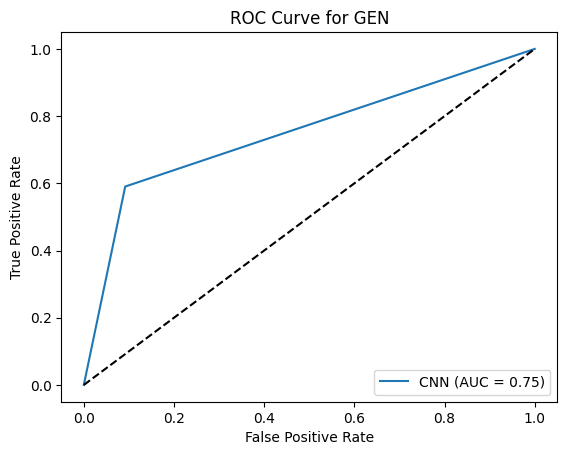

In [ ]:
#CNN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical


# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
data_pca = pca.fit_transform(data_scaled)

# Define CNN model function
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, input_shape=(data_pca.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(32, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize CNN model
cnn = create_cnn_model()

labels = ['CIP', 'CTX', 'CTZ', 'GEN']
for label in labels:
    print(f"\nClassification for {label}:")
    # Label encoding for the current label
    y = pheno[label]
    y_encoded = to_categorical(y)  # Convert labels to one-hot encoding

    # Perform 5-fold cross-validation and prediction
    kf = KFold(n_splits=5)
    cnn_pred = np.zeros_like(y_encoded)
    for train_index, test_index in kf.split(data_pca):
        X_train, X_test = data_pca[train_index], data_pca[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]

        cnn.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=10, batch_size=32, verbose=0)
        cnn_pred[test_index] = cnn.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))

    # Convert predictions back to labels
    cnn_pred_labels = np.argmax(cnn_pred, axis=1)

    # Calculate accuracy scores
    cnn_accuracy = accuracy_score(y, cnn_pred_labels)

    # Print accuracy score
    print("CNN Accuracy:", cnn_accuracy)

    # Generate classification report
    cnn_report = classification_report(y, cnn_pred_labels)

    # Print classification report
    print("\nCNN Classification Report:")
    print(cnn_report)

    # Calculate ROC curve and AUC for CNN
    fpr, tpr, _ = roc_curve(y, cnn_pred_labels)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve for CNN
    plt.figure()
    plt.plot(fpr, tpr, label=f'CNN (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {label}')
    plt.legend(loc='lower right')
    plt.show()
